In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot
import numpy as np
import time

In [2]:
(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


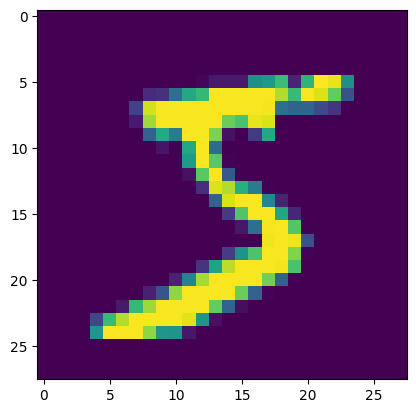

In [4]:
pyplot.imshow(x_train[0].reshape((28, 28)))

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(32, activation='relu'),          # (784 + 1) x 32 = 25120
  tf.keras.layers.Dense(32, activation='relu'),          # (32  + 1) x 32 = 1056
  tf.keras.layers.Dense(10, activation='softmax')        # (32  + 1) x 10 = 330
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [8]:
start_time = time.time()
model.fit(x_train, y_train, epochs=20, batch_size=64,validation_data=(x_valid, y_valid))
end_time = time.time()
print("Completed and took {:.3f} s".format(end_time - start_time))

Epoch 1/20
938/938 [==============================] - 6s 4ms/step - loss: 1.8341 - sparse_categorical_accuracy: 0.6370 - val_loss: 0.6795 - val_sparse_categorical_accuracy: 0.7943
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.5462 - sparse_categorical_accuracy: 0.8497 - val_loss: 0.4605 - val_sparse_categorical_accuracy: 0.8822
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.4075 - sparse_categorical_accuracy: 0.8903 - val_loss: 0.3741 - val_sparse_categorical_accuracy: 0.9004
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3510 - sparse_categorical_accuracy: 0.9067 - val_loss: 0.3431 - val_sparse_categorical_accuracy: 0.9145
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3239 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.3403 - val_sparse_categorical_accuracy: 0.9138
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2994 - sparse_categorica

313/313 [==============================] - 0s 903us/step
----------> the probability:  [2.9731294e-05 9.8474547e-03 6.0835283e-04 4.1058781e-03 4.8453918e-01
 2.5718571e-03 3.2320109e-05 1.2113544e-03 1.3533726e-02 4.8352018e-01]
the prediction:  4
the answer:  9
----------> the probability:  [4.8894339e-08 9.8952150e-05 4.3471232e-02 8.0539346e-01 2.4729935e-10
 2.8485322e-06 1.9335196e-16 1.5030967e-01 7.2374538e-04 1.1218142e-07]
the prediction:  3
the answer:  7
----------> the probability:  [5.1685841e-08 4.4315049e-05 3.9315550e-03 3.6706388e-05 6.0901487e-01
 1.7344105e-04 1.3035566e-08 3.8629562e-01 3.1087864e-06 5.0027604e-04]
the prediction:  4
the answer:  7
----------> the probability:  [0.02666862 0.03081993 0.02901032 0.0997148  0.12228557 0.04676684
 0.00128882 0.09127853 0.1998368  0.35232973]
the prediction:  9
the answer:  2


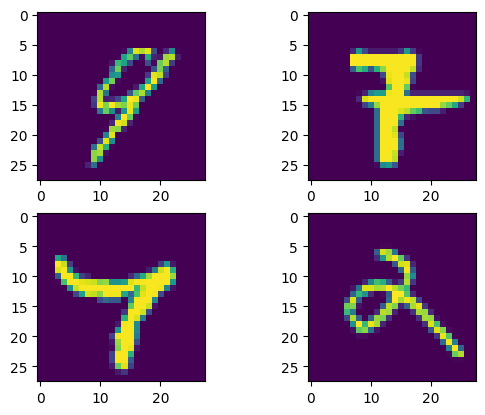

In [10]:
predictions = model.predict(x_valid) # batch prediction
index = 1

for i in range(1000):
    pValue = np.argmax(predictions[i]) # Predicted values
    rValue = y_valid[i] # Actual values
    if pValue != rValue:  # error
        print("----------> the probability: ",predictions[i])
        print("the prediction: ",np.argmax(predictions[i]))
        print("the answer: ",y_valid[i])
        pyplot.subplot(2,2,index)
        pyplot.imshow(x_valid[i].reshape((28, 28)))
        index = index +1
        if index > 4:
            break

In [74]:
len(predictions)

10000